In [3]:
import pandas as pd 
import numpy as np 
import re
import nltk

In [4]:
df1 =pd.read_csv('twitter_racism_parsed_dataset.csv')
df1.head()

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0


In [5]:
df1.drop(['index', 'id', 'Annotation'],axis=1,inplace=True)
df1.head()

,Text,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1
1,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1
3,"Finally I'm all caught up, and that sudden dea...",0
4,@carolinesinders @herecomesfran *hugs*,0


In [6]:
df2 =pd.read_csv('twitter_sexism_parsed_dataset.csv')
df2.head()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


In [7]:
df2.drop(['index', 'id', 'Annotation'],axis=1,inplace=True)
df2.head()

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1.0
1,There's some very hate able teams this year #MKR,0.0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0.0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0.0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1.0


In [8]:
df3 =pd.read_csv('youtube_parsed_dataset.csv')
df3.head()

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [9]:
df3.drop(['UserIndex', 'index', 'Number of Comments','Number of Subscribers','Membership Duration','Number of Uploads','Profanity in UserID','Age'],axis=1,inplace=True)
df3.head()

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


In [10]:
df4 =pd.read_csv('labeled_tweets.csv')
df4.head()

,id,label,full_text
0,572342978255048705,Offensive,So Drasko just said he was impressed the girls...
1,572342978255048705,Offensive,So Drasko just said he was impressed the girls...
2,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...
3,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...
4,572340476503724032,Offensive,Hopefully someone cooks Drasko in the next ep ...


In [11]:
df4.drop(['id'], axis=1,inplace=True)
df4.head()

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
1,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...
3,Offensive,Drasko they didn't cook half a bird you idiot ...
4,Offensive,Hopefully someone cooks Drasko in the next ep ...


In [12]:
df4.rename(columns={'full_text': 'Text'},inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df4['oh_label'] = encoder.fit_transform(df4['label'])

In [15]:
df4.drop(['label'], axis=1,inplace=True)
df4.head()

,Text,oh_label
0,So Drasko just said he was impressed the girls...,1
1,So Drasko just said he was impressed the girls...,1
2,Drasko they didn't cook half a bird you idiot ...,1
3,Drasko they didn't cook half a bird you idiot ...,1
4,Hopefully someone cooks Drasko in the next ep ...,1


In [16]:
df4.shape

(11090, 2)

In [17]:
frames = [df1, df2, df3]

result = pd.concat(frames)

In [18]:
result.head()

,Text,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1.0
1,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,0.0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1.0
3,"Finally I'm all caught up, and that sudden dea...",0.0
4,@carolinesinders @herecomesfran *hugs*,0.0


In [19]:
result.shape

(31816, 2)

In [20]:
result.isnull().sum()

Text        1
oh_label    3
dtype: int64

In [21]:
result.dropna(inplace =True)
result.isnull().sum()

Text        0
oh_label    0
dtype: int64

In [22]:
result.duplicated().sum()

11503

In [23]:
result.drop_duplicates(keep=False,inplace=True)
#result= result.drop_duplicates(keep='first')
result.shape

(8808, 2)

In [24]:
result['oh_label'].value_counts()

1.0    5764
0.0    3044
Name: oh_label, dtype: int64

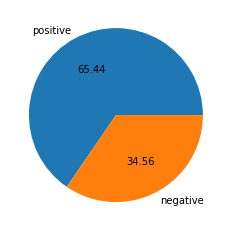

In [25]:
import matplotlib.pyplot as plt 
plt.pie(result['oh_label'].value_counts(), labels=['positive','negative'], autopct= "%0.2f")
plt.show()

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [30]:
#result['num_charecters'] = result['Text'].apply(len)

Data Preprocessing

lower case

removal of special charecter

tokenization

removing stop words

stemming

In [31]:
def transform_text(text):
    #lower case
    text= text.lower()
    #text tokenization( converting into list)
    text = nltk.word_tokenize(text)

    #removing special charecter
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #r = re.findall(pattern,text)
    #for i in r:
    #    text = re.sub(i,"",text)
    
    #removing stop words
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    #stemming
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
result['transform_text'] = result['Text'].apply(transform_text)

In [33]:
result.head()

,Text,oh_label,transform_text
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1.0,aalwuhaib1977 muslim mob violenc hindu banglad...
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1.0,jncatron ampalestin islamophobia like idea naz...
8,@HuffPostRelig Islam invaded and conquered 2/3...,1.0,huffpostrelig islam invad conquer christiandom...
9,@semzyxx Do you approve of your pedophile prop...,1.0,semzyxx approv pedophil prophet rape 9 year ol...
10,@watan71969 @geeky_zekey Problem with vile Mus...,1.0,watan71969 problem vile muslim tri ration amp ...


In [34]:
from wordcloud import WordCloud,ImageColorGenerator
wc = WordCloud(width=1000, height=1000, min_font_size= 10, background_color='white')

In [35]:
negative_wc = wc.generate(result[result['oh_label']==1]['transform_text'].str.cat(sep=" "))

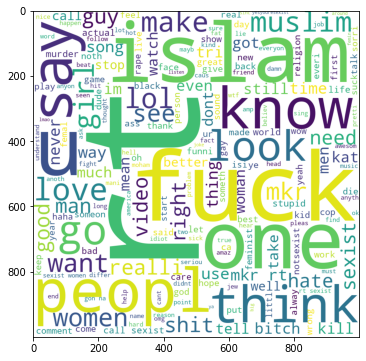

In [36]:
plt.figure(figsize=(20,6))
plt.imshow(negative_wc)

In [37]:
positive_wc = wc.generate(result[result['oh_label']==0]['transform_text'].str.cat(sep=" "))

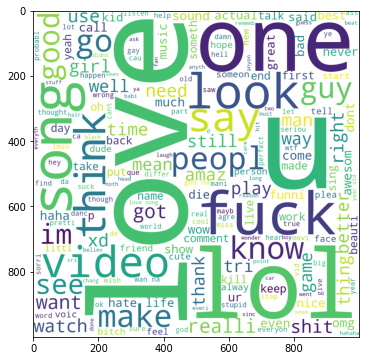

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

MODEL BUILDING

In [39]:
#STARTING OF MODEL BUILDING

# BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [40]:
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [41]:
# bag-of-words feature matrix
X = tfidf.fit_transform(result['transform_text']).toarray()

X.shape

(8808, 3000)

In [42]:
y= result['oh_label'].values
y

array([1., 1., 1., ..., 0., 0., 0.])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [46]:
gnb= GaussianNB()
mnb =  MultinomialNB()
bnb = BernoulliNB()


In [47]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1))

0.8967082860385925
[[ 538   60]
 [ 122 1042]]
0.9455535390199638
0.9196822594880848


In [48]:
mnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

0.8967082860385925
[[ 538   60]
 [ 122 1042]]
0.9455535390199638
0.9196822594880848


In [49]:
bnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(f1_score(y_test, y_pred2))

0.8967082860385925
[[ 538   60]
 [ 122 1042]]
0.9455535390199638
0.9196822594880848


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [51]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators= 50, random_state= 2)

In [52]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'RF' : rfc

}

In [53]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, f1

In [54]:
train_classifier(mnb, X_train, y_train, X_test, y_test)

(0.9375709421112373, 0.9790909090909091, 0.9514134275618374)

In [55]:
accuracy_scores = []
precision_scores = []
f1_scores = []
for name,clf in clfs.items():
    current_accuracy, current_precision, current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("for ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)
    print("f1 - ", current_f1)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)

for  LR
Accuracy -  0.9262202043132803
Precision -  0.9599644128113879
f1 -  0.9431818181818182
for  SVC
Accuracy -  0.9233825198637912
Precision -  0.9565217391304348
f1 -  0.9410737669140113
for  NB
Accuracy -  0.9375709421112373
Precision -  0.9790909090909091
f1 -  0.9514134275618374
for  DT
Accuracy -  0.8904653802497162
Precision -  0.9110922946655376
f1 -  0.9176972281449894
for  RF
Accuracy -  0.9216799091940976
Precision -  0.9655172413793104
f1 -  0.9390997352162401


In [63]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'F1':f1_scores}).sort_values('Accuracy', ascending= False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision,F1
2,NB,0.937571,0.979091,0.951413
0,LR,0.926220,0.959964,0.943182
1,SVC,0.923383,0.956522,0.941074
4,RF,0.921680,0.965517,0.939100
3,DT,0.890465,0.911092,0.917697


In [64]:
performance_df1 = pd.melt(performance_df, id_vars= "Algorithm")

In [65]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.937571
1,LR,Accuracy,0.926220
2,SVC,Accuracy,0.923383
3,RF,Accuracy,0.921680
4,DT,Accuracy,0.890465
5,NB,Precision,0.979091
6,LR,Precision,0.959964
7,SVC,Precision,0.956522
8,RF,Precision,0.965517
9,DT,Precision,0.911092


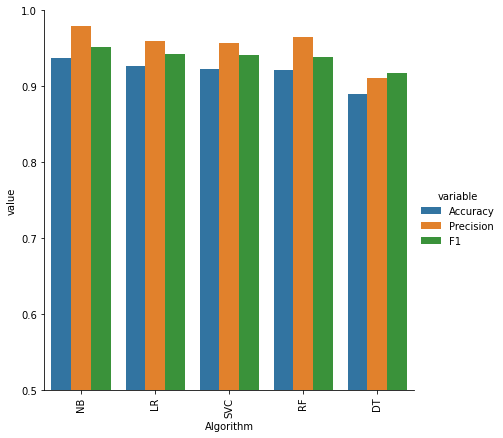

In [70]:
import seaborn as sns
sns.catplot(x = 'Algorithm', y = 'value', hue= 'variable', data= performance_df1, kind = 'bar', height = 6)
plt.ylim(0.5,1.0)
plt.xticks(rotation= 'vertical')
plt.show()

In [ ]:
import pickle
#pickle.dump(cv,open('vectorizer.pkl', 'wb'))
#pickle.dump(rfc,open('model.pkl', 'wb'))

In [ ]:
#pickle.dump(tfidf,open('vectorizer3.pkl', 'wb'))
#pickle.dump(mnb,open('model3.pkl', 'wb'))